In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import collections
import re
import csv
from prettytable import PrettyTable
from nltk.corpus import stopwords
from langdetect import detect
from nltk import wordpunct_tokenize
import nltk
from twitter import *
from StringIO import StringIO
from zipfile import ZipFile
from urllib import urlopen
from stop_words import get_stop_words
import sys 

%matplotlib inline


In [3]:
tweets_data     = []
tweets_hashtags = {}

config = {}
execfile("config.py", config)

In [4]:
################################
# Read Tweets (new_tweets.txt)
################################

def read_tweets(): 
    dumped_tweets_path = 'new_tweets.txt'  #'new_tweets.txt'
    tweets_file = open(dumped_tweets_path, "r")
    
    cnt=0
    
    for line in tweets_file.readlines():
        #print line
           
        if 'text' in line:
            
            #print line.values()
            cnt+=1
            tweet = json.loads(line)
            tweets_data.append(tweet)
            
            
    print cnt #len(tweets_data)
    
    
read_tweets()  #Read all the tweets from a file

460


In [5]:
################################
# General Tweet Analyzer
################################

def extract_hash_tags(s):    
    return set(part[1:] for part in s.split() if part.startswith('#'))

def general_tweets_analyzer():
    
    print "\n First 5 tweets : " 
    for i in range(0,5):
        print tweets_data[i]['text']
    for t in tweets_data:
        tweets_hashtags[t['text']] = extract_hash_tags(t['text'])
    
    # flatten it to find popular hash tags
    hashtags = []
    for t in tweets_hashtags.keys():
        hashtags.append(tweets_hashtags[t])

    # get the count of each hashtag
    count = collections.Counter()
    for h in hashtags:
        count.update(h)

    print "\n Popular hash tags : "
    pt = PrettyTable(field_names=['HashTag', 'Count'])
    [ pt.add_row(c) for c in count.most_common()[:10] ]
    pt.align['HashTag'], pt.align['Count'] = 'l', 'r'
    print pt
    
general_tweets_analyzer()


 First 5 tweets : 
RT @pearyploy799: กูไม่ได้ด่ามั่ว กูไม่เคยอวย กูไม่เคยชงฮุนเบย์ลู่เบย์อะไรทั้งสิ้น กูเห็นในความพยายามและความเยอะและเฟคเท่านั้น #ไม่ติ่งbyเบ…
RT @dr_danish57: May Allah(SWT) bless us all 😊😇. Don't forget to pray for all poor,weak &amp; sick people.
#JummahMubarak https://t.co/Nu9EZGEP…
RT @SigaMUSlCAS: Mas o problema é que eu te quero e o tempo que preciso for, eu espero pra mim felicidade e ter você. 🎤
RT @dannyyonce: like seriously Kelly is literally a Black Barbie, JUST LOOK AT HER GLOWING https://t.co/DjM3CjUGwe
Brick Sculptures https://t.co/JHj7gAzW4V

 Popular hash tags : 
+-------------------+-------+
| HashTag           | Count |
+-------------------+-------+
| KCA               |     8 |
| VoteMaineFPP      |     3 |
| ExchangeRate      |     2 |
| VoteKathrynFPP    |     2 |
| ALDUBRegaloNiLola |     2 |
| احساسك_بتغريده    |     1 |
| BNM               |     1 |
| show              |     1 |
| harajuku          |     1 |
| JYCCV             |     1 |
+----

Total Number Tweets :  460


Total Number of Original Tweets :  291
Total Number of Retweets :  169


C:\Users\Bhagyesh\Anaconda2\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


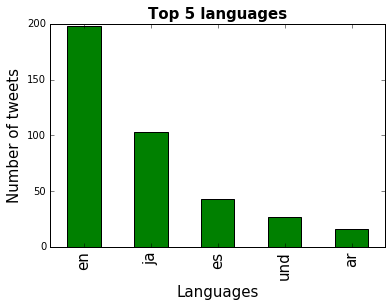

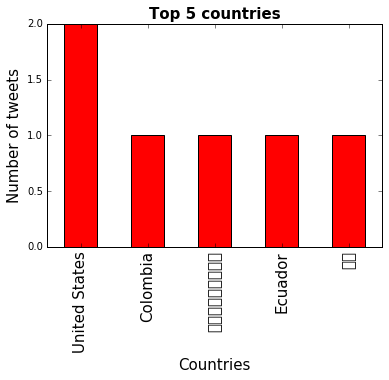

In [6]:
################################
# Tweets Statistics
################################

def tweets_statistics():    
    
    print "Total Number Tweets : ", len(tweets_data)
    
    # Print top 5 languages in which tweets were written
    tweets = pd.DataFrame()
    tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
    tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
    tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)

    tweets_by_lang = tweets['lang'].value_counts()
    fig, ax = plt.subplots()
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlabel('Languages', fontsize=15)
    ax.set_ylabel('Number of tweets' , fontsize=15)
    ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
    tweets_by_lang[:5].plot(ax=ax, kind='bar', color='green')
    
    #%matplotlib inline
    fig.show()
    
    # Print top 5 countries from which the tweets were sent
    print "\n"
    tweets_by_country = tweets['country'].value_counts()
    fig, ax = plt.subplots()
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlabel('Countries', fontsize=15)
    ax.set_ylabel('Number of tweets' , fontsize=15)
    ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
    tweets_by_country[:5].plot(ax=ax, kind='bar', color='red')
    
    #%matplotlib inline
    fig.show()
   
    # Get total number of original tweets and retweets
    original_tweets = 0
    retweets        = 0
    for t in tweets_data:
        if t['text'].startswith('RT'):
            retweets += 1
        else:
            original_tweets += 1
            
    print "Total Number of Original Tweets : ", original_tweets
    print "Total Number of Retweets : ", retweets

tweets_statistics()

In [9]:
################################
# Language Detector
################################

def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the 
    natural language of the input text
    """   
    input_text = input_text.lower()
    input_words = wordpunct_tokenize(input_text)
    language_likelihood = {}
    total_matches = 0

    #print stopwords
    
    for language in stopwords.fileids():
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))
    return language_likelihood
 
def get_language(input_text):
    """Return the most likely language of the given text
    """
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

# print language of first 5 tweets
def language_detector():
    for i in range(3,18):
        testTweet = tweets_data[i]['text']
        print "tweet: ", testTweet
        print "Language: ", get_language(testTweet)
        print "\n"       
language_detector()

tweet:  RT @dannyyonce: like seriously Kelly is literally a Black Barbie, JUST LOOK AT HER GLOWING https://t.co/DjM3CjUGwe
Language:  english


tweet:  Brick Sculptures https://t.co/JHj7gAzW4V
Language:  french


tweet:  RT @TARSEMCHANANA: @Gurmeetramrahim 
Guru ji make my morning by your sweet tweets !!!
Thank you so much your pious blessing !!
#StillMSG2Ev…
Language:  english


tweet:  RT @drunk: "Where do you see yourself in 60 years"  https://t.co/xweG5C0UZ7
Language:  english


tweet:  Ella tiene toda la atención y él es ignorado.
Language:  french


tweet:  إثنـــان لا يعـرفون طعــم الحــــب رجـــل كــل يــوم مع إمــرأه جديــده وإمـــرأه تغـــري الرجـــال بجمالهــــا
Language:  swedish


tweet:  RT @serrranista: si ves esta foto te ves obligado a darle rt #VotaJulianSerrano #KCA https://t.co/kmgatlUIss
Language:  portuguese


tweet:  RT @pp_hipproploy: เกลียด GIF นี้มากกกกก
#exoเป็นวงตลก https://t.co/255VI3yfaC
Language:  french


tweet:  She forever falling asleep on me 🙄
Langua

In [10]:
##########################
# Tweet classifier
##########################

#start process_tweet
def processTweet(tweet):
    tweet = tweet.lower() #convert to lower case
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet) #convert www.* or https?://* to URL
    tweet = re.sub('@[^\s]+','AT_USER',tweet) #convert @username to AT_USER
    tweet = re.sub('[\s]+', ' ', tweet)  #remove additional white spaces
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet) #replace #word with word
    tweet = tweet.strip('\'"') #trim
    return tweet

#initialize stopWords
stopWords = []

#start replaceTwoOrMore
def replaceTwoOrMore(s):
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)


#start getStopWordList
def getStopWordList(stopWordListFileName):
    stopWords = []      #read the stopwords file and build a list
    stopWords.append('AT_USER')
    stopWords.append('URL')
    fp = open(stopWordListFileName, 'r')
    line = fp.readline()
    while line:
        word = line.strip()
        stopWords.append(word)
        line = fp.readline()
    fp.close()
    return stopWords

#start getfeatureVector
def getFeatureVector(tweet, stopWords):
    featureVector = []
    words = tweet.split()    #split tweet into words
    for w in words:
        w = replaceTwoOrMore(w)        #replace two or more with two occurrences
        w = w.strip('\'"?,.')        #strip punctuation
        val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*$", w)        #check if the word stats with an alphabet
        #ignore if it is a stop word
        if(w in stopWords or val is None):
            continue
        else:
            featureVector.append(w.lower())
    return featureVector

featureList = {}
#start extract_features
def extract_features(tweet):
    tweet_words = set(tweet)
    features = {}
    for word in featureList:
        features['contains(%s)' % word] = (word in tweet_words)
    return features
#end

def tweets_classifier():

    #Read the tweets one by one and process it
    inpTweets = csv.reader(open('data/sampleLabledTweets.csv', 'rb'), delimiter=',', quotechar='|')
    stopWords = getStopWordList('data/stopWords.txt')
    featureList = []

    # Get tweet words
    tweets = []
    for row in inpTweets:
        
        sentiment = row[0]
        tweet = row[1]
        processedTweet = processTweet(tweet)
        featureVector = getFeatureVector(processedTweet, stopWords)
        #print featureVector
        featureList.extend(featureVector)
        tweets.append((featureVector, sentiment));
    
    # Remove featureList duplicates
    featureList = list(set(featureList))

    # Extract feature vector for all tweets in one shot
    training_set = nltk.classify.util.apply_features(extract_features, tweets)
    
#    print training_set

    # Train the classifier
    NBClassifier = nltk.NaiveBayesClassifier.train(training_set)

    # Test the classifier
    for i in range(0,10):
        testTweet = tweets_data[i]['text']
        processedTestTweet = processTweet(testTweet)
        print "tweet", testTweet 
        print "class : ", NBClassifier.classify(extract_features(getFeatureVector(processedTestTweet, stopWords)))

    for t in tweets_data:
        print t
        if tweets_hashtags[t['text']] in ('sport','art', 'arts', 'politics', 'food', 'fashion'):
            print "tweet: ", t['text']
            processedTestTweet = processTweet(t['text'])
            print "class: ", NBClassifier.classify(extract_features(getFeatureVector(processedTestTweet, stopWords)))

tweets_classifier();

tweet RT @pearyploy799: กูไม่ได้ด่ามั่ว กูไม่เคยอวย กูไม่เคยชงฮุนเบย์ลู่เบย์อะไรทั้งสิ้น กูเห็นในความพยายามและความเยอะและเฟคเท่านั้น #ไม่ติ่งbyเบ…
class :  sport
tweet RT @dr_danish57: May Allah(SWT) bless us all 😊😇. Don't forget to pray for all poor,weak &amp; sick people.
#JummahMubarak https://t.co/Nu9EZGEP…
class :  sport
tweet RT @SigaMUSlCAS: Mas o problema é que eu te quero e o tempo que preciso for, eu espero pra mim felicidade e ter você. 🎤
class :  sport
tweet RT @dannyyonce: like seriously Kelly is literally a Black Barbie, JUST LOOK AT HER GLOWING https://t.co/DjM3CjUGwe
class :  sport
tweet Brick Sculptures https://t.co/JHj7gAzW4V
class :  sport
tweet RT @TARSEMCHANANA: @Gurmeetramrahim 
Guru ji make my morning by your sweet tweets !!!
Thank you so much your pious blessing !!
#StillMSG2Ev…
class :  sport
tweet RT @drunk: "Where do you see yourself in 60 years"  https://t.co/xweG5C0UZ7
class :  sport
tweet Ella tiene toda la atención y él es ignorado.
class :  sport
tweet إ

In [11]:
#####################################
# Trend Analyzer for given location
#####################################

def trend_analyzer():
    twitter = Twitter(auth = OAuth(config["access_token"], config["access_token_secret"], config["consumer_key"], config["consumer_secret"]))
    results = twitter.trends.place(_id = 2379574)

    print "Current trends in Chicago"
    for location in results:
        for trend in location["trends"]:
            #print location["trends"]
            print " - %s" % trend["name"]
trend_analyzer()

Current trends in Chicago
 - #DemDebate
 - #TheWalkingDead
 - #DowntonAbbey
 - #Quantico
 - #askcamila
 - Warriors
 - Florida Gulf Coast
 - Jerry Bridges
 - #RHOA
 - #LIMLive
 - #OnceUponATime
 - #RaceForWH
 - #Dateline
 - #PutBaeInShakespeare
 - #LAvDC
 - #TheGoodWife
 - #LastManOnEarth
 - #NBLVIP
 - #SaintsAndSinners
 - #StellarAwards
 - #SEAvSKC
 - #MyRacialBlindspot
 - #Shameless
 - #Billions
 - #CutthroatKitchen
 - #DunkCity
 - #IAmCait


In [12]:
#####################################
# Tweet Sentiment Analysis
#####################################

# Download the AFINN lexicon, unzip, and read the latest word list in AFINN-111.txt
from StringIO import StringIO
from zipfile import ZipFile
from urllib import urlopen

url = urlopen('http://www2.compute.dtu.dk/~faan/data/AFINN.zip')
zipfile = ZipFile(StringIO(url.read()))
afinn_file = zipfile.open('AFINN/AFINN-111.txt')

afinn = dict()
for line in afinn_file:
    parts = line.strip().split()
    if len(parts) == 2:
        afinn[parts[0]] = int(parts[1])

In [13]:
import re
def tokenize(text):
    return re.sub('\W+', ' ', text.lower()).split()

def afinn_sentiment(terms, afinn):
    total = 0.
    for t in terms:
        if t in afinn:
            total += afinn[t]
    return total

def sentiment_analyzer():
    tokens = [tokenize(t['text']) for t in tweets_data]  #Tokenize all the tweets
    afinn_total = []
    for tweet in tokens:
        total = afinn_sentiment(tweet, afinn)
        afinn_total.append((' '.join(tweet), total))
    
    # Print total sentiments in a tweets:
    for tweet,total in sorted(afinn_total, key=lambda x: x[1], reverse=True)[:1000]:
        if total > 0:
            print '\n Positive Sentiment =',total,tweet
        elif total < 0:
            print '\n Negative Sentiment',total,tweet
        else:
            print '\n Neutral Sentiment',total,tweet
sentiment_analyzer()


 Positive Sentiment = 14.0 rt trvlgenieapp retweet to win travel prize genie plans itinerary 4 u love fun f4f sun beach happy https t co dnyyzqjcex http

 Positive Sentiment = 8.0 tullarabigail happy birthday abs hope you had a great one

 Positive Sentiment = 8.0 enter to win a 100 visa prepaid gift card to help in your community https t co utmedd2fg7 liveongiveon https t co x17t2k9few

 Positive Sentiment = 7.0 rt tarsemchanana gurmeetramrahim guru ji make my morning by your sweet tweets thank you so much your pious blessing stillmsg2ev

 Positive Sentiment = 5.0 rt femaiestruggs life is beautiful cherish it

 Positive Sentiment = 5.0 green lantern won t appear in the dc movie universe until justice league part two https t co aqaadgpe0y flash storystream

 Positive Sentiment = 5.0 win 1k at ladbrokes games lead the race for a share of 5k on your fave slots https t co zjhyi3ntdp https t co ootzd1gl8w

 Positive Sentiment = 5.0 rt markingtuan jaebum might be sassy and chic but deep do

In [14]:
#####################################
# Make Vocabulary
#####################################

from collections import defaultdict

def tokenize(text):
    return re.sub('\W+', ' ', text.lower()).split()

tokens = [tokenize(t['text']) for t in tweets_data]  #Tokenize all the tweets

def make_vocabulary():
    vocabulary = defaultdict(lambda: len(vocabulary))  # If term not present, assign next int.
    for tokens1 in tokens:
        for token in tokens1:
            vocabulary[token]  # looking up a key; defaultdict takes care of assigning it a value.
    print '%d unique terms in vocabulary' % len(vocabulary)
    return vocabulary

make_vocabulary()

2355 unique terms in vocabulary


defaultdict(<function __main__.<lambda>>,
            {u'nwt': 1376,
             u'limited': 532,
             u'kstgktjmbh': 212,
             u'dailyrapfacts': 1592,
             u'frios': 900,
             u'pearyploy799': 1,
             u'yellow': 413,
             u'sleep': 2032,
             u'mirage': 750,
             u'hate': 575,
             u'petxj30dyu': 1358,
             u'aujeromitzi': 2248,
             u'aud': 1920,
             u'superenlo': 2313,
             u'tweet': 1034,
             u'voted': 1741,
             u'abra': 1421,
             u'zun5w5swng': 436,
             u'sorry': 1989,
             u'kennedynation': 1343,
             u'dela': 1326,
             u'jht9j0ulxa': 356,
             u'gusquijass': 735,
             u'every': 1264,
             u'updates': 156,
             u'osdxi07m5e': 1116,
             u'huskylock': 529,
             u'prize': 1994,
             u'cause': 937,
             u'prizm': 929,
             u'todoreflexion': 818,
  

In [15]:
#####################################
# Word Contribute
#####################################

from collections import Counter
def max_contribute():
    all_counts = Counter()
    for tweet in tokens:
        all_counts.update(tweet)
    sorted_tokens = sorted(all_counts.items(), key=lambda x:x[1], reverse=True)
    i = 0
    for token, count in sorted_tokens:
        if token in afinn:
            print '%s count=%d sentiment=%d' % (token, count, afinn[token])
            i += 1
            if i > 20:
                break
max_contribute()

like count=15 sentiment=2
no count=13 sentiment=-1
love count=6 sentiment=3
want count=5 sentiment=1
drunk count=4 sentiment=-2
top count=3 sentiment=2
care count=3 sentiment=2
beautiful count=3 sentiment=3
dream count=3 sentiment=1
help count=3 sentiment=2
good count=3 sentiment=3
bless count=3 sentiment=2
pretty count=3 sentiment=1
sweet count=3 sentiment=2
big count=3 sentiment=1
win count=3 sentiment=4
bitch count=3 sentiment=-5
sick count=3 sentiment=-2
better count=2 sentiment=2
faith count=2 sentiment=1
rich count=2 sentiment=2


In [ ]:
def getChoice():
    
    print("\nOperations : ")
    print("\n1. Read Tweets\n2. General Analyzer\n3. Tweets Statistics")
    print("4. Language Detector\n5. Tweet Classifier\n6. Trend Analyzer")
    print("7. Sentiment Analyzer\n8. Create Vocabulary\n9. Words Contribute\n10. exit")
    choose_option=raw_input("\nSelect an operation number : ")
    choice=choose_option.lower()

    return choice

In [ ]:
choice = getChoice()

while choice!="11" :
    if choice=="1":
        read_tweets()
    elif choice=="2":
        general_tweets_analyzer()
    elif choice=="3":
        tweets_statistics()
    elif choice=="4":
        language_detector()
    elif choice=="5":
        tweets_classifier()
    elif choice=="6":
        trend_analyzer()
    elif choice=="7":
        sentiment_analyzer()
    elif choice=="8":
        tokens = [tokenize(t['text']) for t in tweets_data]
        make_vocabulary()
    elif choice=="9":
        tokens = [tokenize(t['text']) for t in tweets_data]
        max_contribute() 
    else:
        sys.exit()

    choice = getChoice()

print "Exiting"